In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('C:\\Users\\Asus\\Pictures\\Data_Science_Internship Tasks\\fico.csv')
df2 = pd.read_csv('C:\\Users\\Asus\\Pictures\\Data_Science_Internship Tasks\\region.csv')

In [3]:
df1.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# data cleaning

In [5]:
# checking duplicates values
df1.duplicated().sum()

13

In [6]:
df1.drop_duplicates(inplace=True)

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.shape

(100000, 2)

# missing values

In [9]:
df1.isnull().sum()

acct_id        0
FICO       29612
dtype: int64

In [10]:
print(df1['FICO'].value_counts())

850    12059
836      865
845      836
828      746
841      668
       ...  
496        1
AA         1
462        1
440        1
SSS        1
Name: FICO, Length: 377, dtype: int64


In [11]:
# first we can see in fico column have impurity(words)

In [12]:
df1['fico']=df1['FICO'].str.isnumeric()

In [13]:
df1.head()

,acct_id,FICO,fico
0,1,768,True
1,2,850,True
2,3,677,True
3,4,843,True
4,5,796,True


In [14]:
# keep only numerical values
new_df=df1[df1['fico']!=False]

In [15]:
new_df

,acct_id,FICO,fico
0,1,768,True
1,2,850,True
2,3,677,True
3,4,843,True
4,5,796,True
...,...,...,...
100007,99995,NaN,NaN
100008,99996,NaN,NaN
100009,99997,NaN,NaN
100010,99998,NaN,NaN


In [16]:
new_df.drop(['fico'],axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_8336/2281447934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['fico'],axis=1,inplace=True)


In [17]:
new_df.isnull().sum()

acct_id        0
FICO       29612
dtype: int64

In [18]:
new_df['FICO'].median()

804.0

In [19]:
new_df['FICO'] = new_df['FICO'].fillna(804)

C:\Users\Asus\AppData\Local\Temp/ipykernel_8336/1431614451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FICO'] = new_df['FICO'].fillna(804)


In [20]:
new_df['FICO'] = new_df['FICO'].astype('int')

C:\Users\Asus\AppData\Local\Temp/ipykernel_8336/3221242485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FICO'] = new_df['FICO'].astype('int')


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   acct_id  99998 non-null  int64
 1   FICO     99998 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.9 MB


# MERGE BOTH DATASET

In [22]:
new_data = pd.merge(new_df,df2,on='acct_id')

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100171 entries, 0 to 100170
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100171 non-null  int64 
 1   FICO     100171 non-null  int32 
 2   region   100171 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 2.7+ MB


In [24]:
# new_data is free from missing values

In [25]:
# check duplicates values
new_data.duplicated().sum()

49

In [26]:
# removing duplictes values

In [27]:
new_data.drop_duplicates(inplace=True)

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100122 entries, 0 to 100170
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100122 non-null  int64 
 1   FICO     100122 non-null  int32 
 2   region   100122 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 2.7+ MB


In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

In [74]:
# Applying elbow method
x = new_data.iloc[:,1:2]

In [65]:
from sklearn.cluster import KMeans
wcss = []

In [66]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

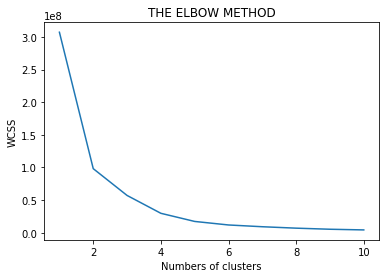

In [67]:
no_clusters = range(1,11)
plt.plot(no_clusters,wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
new_data.head()

,acct_id,FICO,region
0,1,768,New York
1,2,850,Dallas
2,3,677,Los Angeles
3,4,843,Chicago
4,5,796,Philadelphia


# applying KMeans

In [69]:
X = new_data.iloc[:,1:2].values
km  = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

In [70]:
new_data['cluster']=y_means

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='FICO'>

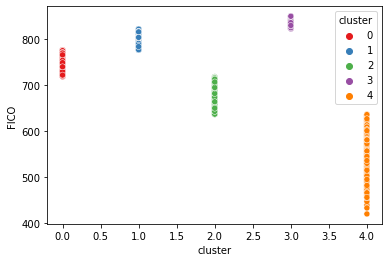

In [71]:
sns.scatterplot('cluster','FICO',data=new_data,palette='Set1',hue='cluster')

<AxesSubplot:ylabel='cluster'>

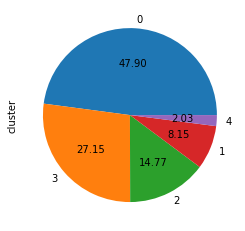

In [59]:
# the number of customers and percentage of each segment .
new_data['cluster'].value_counts().plot(kind='pie',autopct='%0.2f')

In [72]:
# majority customer are in 0 cluster

# the regions which have the second highest and lowest average FICO 

In [73]:
new_data.groupby('region').mean()

,acct_id,FICO,cluster
region,,,
Charlotte,49958.721857,790.687089,1.531182
Chicago,49687.792162,791.286114,1.534440
Dallas,50144.092794,788.427105,1.581989
Houston,49900.938331,791.189742,1.554414
Los Angeles,50150.097808,792.273401,1.558314
New York,50068.375973,790.641090,1.551686
Philadelphia,50015.173610,791.219812,1.557147
Phoenix,50491.765719,792.811971,1.560157
San Antonio,50115.728837,790.222987,1.551077


# SECOND LOWEST --> 'SAN DIEDO'
# SECOND HIGHEST --> 'LOS ANGELES'